# ANN for Digit Recogniation 
### (Sparse Categorical Cross Entropy)

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

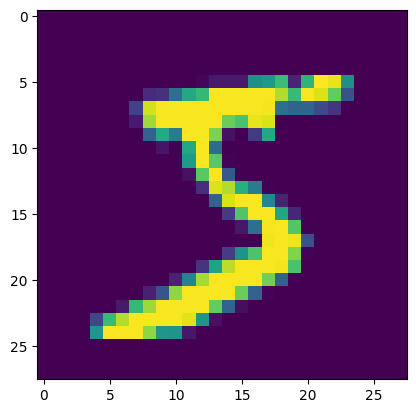

In [4]:
plt.imshow(X_train[0])

In [5]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 21s 11ms/step - loss: 1.7166 - accuracy: 0.6666 - val_loss: 0.7957 - val_accuracy: 0.8023
Epoch 2/25
1500/1500 [==============================] - 14s 9ms/step - loss: 0.6448 - accuracy: 0.8491 - val_loss: 0.4756 - val_accuracy: 0.8887
Epoch 3/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4024 - accuracy: 0.9078 - val_loss: 0.4059 - val_accuracy: 0.9191
Epoch 4/25
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3058 - accuracy: 0.9300 - val_loss: 0.2634 - val_accuracy: 0.9442
Epoch 5/25
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2461 - accuracy: 0.9421 - val_loss: 0.2299 - val_accuracy: 0.9509
Epoch 6/25
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2032 - accuracy: 0.9520 - val_loss: 0.2011 - val_accuracy: 0.9557
Epoch 7/25
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1669 - accuracy: 0.9595 - val_loss: 0.1891 - val

In [9]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [10]:
y_pred=y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [11]:
accuracy_score(y_test,y_pred)

0.969

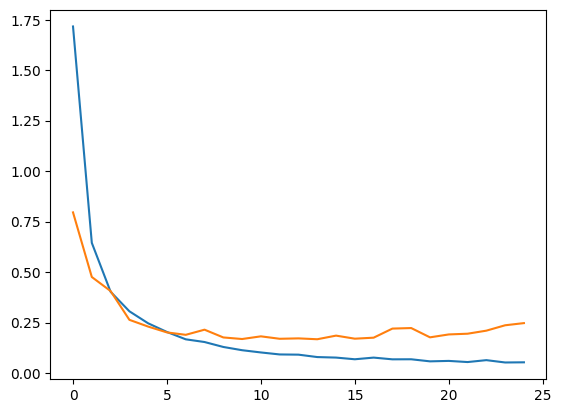

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

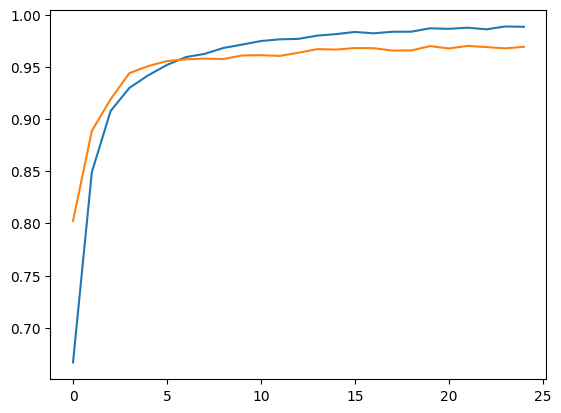

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

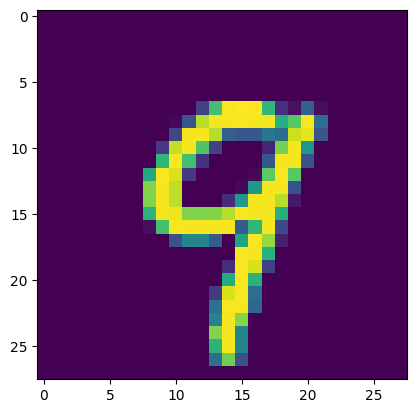

In [14]:
plt.imshow(X_test[12])

In [15]:
print('Predicted No. ---> ',model.predict(X_test[12].reshape(1,28,28)).argmax(axis=1)[0])

1/1 [==============================] - 0s 27ms/step
Predicted No. --->  9
